**Grace Sullivan**

**Final Notebook**

This notebook contains the code for Figures 1 and 2 in our final paper. I was responsible for examining a possible correlation between obesity rates and healthcare expenditures, as well as obesity rates and alcohol consumption. Below is the code for the figures I made. The third code block also shows recorded and projected rates of obesity for the countries of interest that we used as a reference.

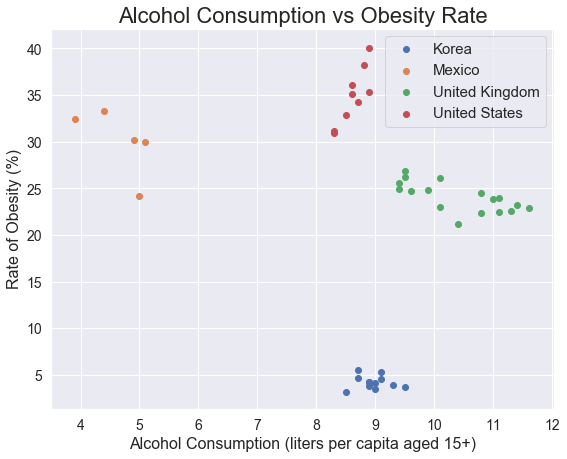

In [4]:
# all import statments for potential reference
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# setting seaborn styling
sns.set()

# reading in data file for obesity rates (total population)
dfTotal = pd.read_csv('dfTotalPopulation.csv', index_col = 0)
# creating a pivot table to make dataframe into appropriate format for plotting
obesity = pd.pivot_table(dfTotal, index = 'Year', columns = 'Country', values = 'Value')

# creating a list of all countries in the pivoted dataframe
allCountries = []
for col in obesity.columns: 
    allCountries.append(col)

# reading in data file for alcohol consumption rates in OECD countries
df_alc = pd.read_csv('EDIToecd_alcohol.csv', index_col = 0)
# removing data outside range of interest: 2000 - 2017. The range() parameter can be adjusted based on what years the senator 
# would like to focus in on
for i in range(1970, 2000):
    df_alc = df_alc.drop([i])
    
# removing 2018 from obesity dataframe, this is the only year the obesity dataframe contains that is out of the desired range of (2000 - 2017)    
obesity = obesity.drop([2018])

# creating a list of countries of interest. The senator can change these to any OECD countries of his/her choice for future analysis.
countriesOfInterest = ['United States', 'United Kingdom', 'Korea', 'Mexico']

# adjusting figure size
plt.figure(figsize = (9, 7))
# iterating through all countries in the dataset and plotting only countries of interest
for country in allCountries:
    if country in countriesOfInterest:
        # creating a scatter plot of each country's alcohol consumption vs obesity rate for available data for years 2000-2017
        plt.scatter(df_alc[country], obesity[country][0:-1], label = country)
# setting design aspects of plot - legend, axes labels, title, size of text
plt.xlabel('Alcohol Consumption (liters per capita aged 15+)', size = 16)
plt.ylabel('Rate of Obesity (%)', size = 16)
plt.title('Alcohol Consumption vs Obesity Rate', size = 22)
plt.legend(prop = {'size': 15})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
# saving image as a png file for use in report - optional for the senator
plt.savefig('alcohol.png')
plt.show()

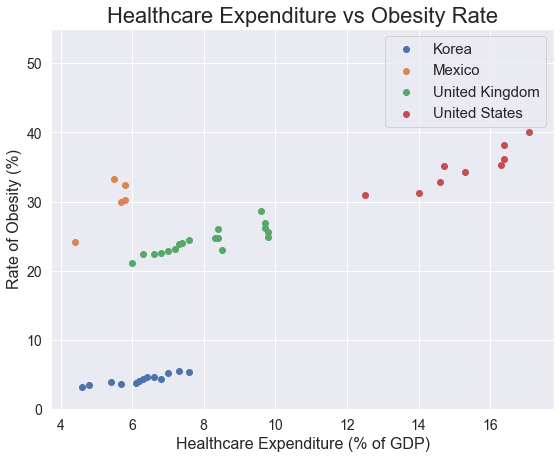

In [2]:
# reading csv file for health expenditures in OECD countries as a percentage of GDP
dfHealth = pd.read_csv('oecd_healthExpenditure.csv', index_col = 0, na_values = '..')
# dropping data outside of range of interest
for i in range(1970, 2000):
    dfHealth = dfHealth.drop([i])
# removing 2018
dfHealth = dfHealth.drop([2018])

# setting figure size
plt.figure(figsize = (9, 7))

# iterating through all countries in obesity dataset to plot only countries of interest
for country in allCountries:
    if country in countriesOfInterest:
        # creating a scatterplot for health expenditure vs obesity rate for each country of interest for each year in range
        plt.scatter(dfHealth[country], obesity[country], label = country)
# setting design aspects of plot - legend, axes labels, title, size of text, range of y axis
plt.xlabel('Healthcare Expenditure (% of GDP)', size = 16)
plt.ylabel('Rate of Obesity (%)', size = 16)
plt.title('Healthcare Expenditure vs Obesity Rate', size = 22)
plt.legend(prop = {'size': 15})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim([0, 55])
# saving scatterplot as a png file - optional for the senator
plt.savefig('healthcareGDP.png')
plt.show()

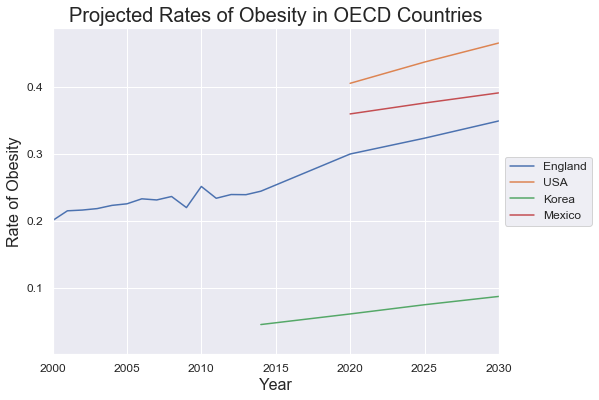

In [3]:
# creating plot of projected obesity rates only for countries of interest
df = pd.read_csv('oecd_projected_obesity.csv', index_col = 0, na_values = '')
# creating a list of all countries in the obesity data set
allCountries = []
for col in df.columns: 
    allCountries.append(col)

# creating a list of countries of interest. The senator can change these to any OECD countries of his/her choice for future analysis.
countriesOfInterest = ['USA', 'England', 'Korea', 'Mexico']

# setting figure size
plt.figure(figsize = (8, 6))

# iterating through all countries in data set to plot only countries of interest
for country in allCountries:
    if country in countriesOfInterest:
        df[country].plot()
        
# setting design aspects of plot - legend, axes labels, title, size of text, range for x axis
plt.legend(prop = {'size': 12}, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Rate of Obesity", fontsize = 16)
plt.title("Projected Rates of Obesity in OECD Countries", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim([2000, 2030])
plt.show()